# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [459]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [460]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')

heroes_df.head()


,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [461]:
powers_df.head()


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [462]:
heroes_df.drop("Unnamed: 0", axis=1, inplace=True)
heroes_df.info

<bound method DataFrame.info of                   name  Gender Eye color               Race        Hair color  \
0               A-Bomb    Male    yellow              Human           No Hair   
1           Abe Sapien    Male      blue      Icthyo Sapien           No Hair   
2             Abin Sur    Male      blue            Ungaran           No Hair   
3          Abomination    Male     green  Human / Radiation           No Hair   
4              Abraxas    Male      blue      Cosmic Entity             Black   
5        Absorbing Man    Male      blue              Human           No Hair   
6          Adam Monroe    Male      blue                  -             Blond   
7         Adam Strange    Male      blue              Human             Blond   
8             Agent 13  Female      blue                  -             Blond   
9            Agent Bob    Male     brown              Human             Brown   
10          Agent Zero    Male         -                  -                 -

## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesnt contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [463]:
heroes_df.describe()


,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


In [464]:
powers_df.describe()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Leader,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665


In [465]:
display(heroes_df.info())
powers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




In [466]:
display(heroes_df.isna().any()) # shows True if something is missing OR display(heroes_df.isnull())
heroes_df.notna() # shows the inverse where it is False when data is missing




name          False
Gender        False
Eye color     False
Race          False
Hair color    False
Height        False
Publisher      True
Skin color    False
Alignment     False
Weight         True
dtype: bool

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True,True,True,True


In [467]:
display(powers_df.isna().any()) # shows True if something is missing OR display(powers_df.isnull()) 
powers_df.notna() # shows the inverse where it is False when data is missing

hero_names               False
Agility                  False
Accelerated Healing      False
Lantern Power Ring       False
Dimensional Awareness    False
Cold Resistance          False
Durability               False
Stealth                  False
Energy Absorption        False
Flight                   False
Danger Sense             False
Underwater breathing     False
Marksmanship             False
Weapons Master           False
Power Augmentation       False
Animal Attributes        False
Longevity                False
Intelligence             False
Super Strength           False
Cryokinesis              False
Telepathy                False
Energy Armor             False
Energy Blasts            False
Duplication              False
Size Changing            False
Density Control          False
Stamina                  False
Astral Travel            False
Audio Control            False
Dexterity                False
                         ...  
Intuitive aptitude       False
Vision -

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [468]:
#tell if there are any null values
display(heroes_df.isna().any().any())
display(powers_df.isna().any().any())



True

False

In [469]:
#tells the no. of missing values in each of the column 
display(heroes_df.isna().sum())
powers_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

hero_names               0
Agility                  0
Accelerated Healing      0
Lantern Power Ring       0
Dimensional Awareness    0
Cold Resistance          0
Durability               0
Stealth                  0
Energy Absorption        0
Flight                   0
Danger Sense             0
Underwater breathing     0
Marksmanship             0
Weapons Master           0
Power Augmentation       0
Animal Attributes        0
Longevity                0
Intelligence             0
Super Strength           0
Cryokinesis              0
Telepathy                0
Energy Armor             0
Energy Blasts            0
Duplication              0
Size Changing            0
Density Control          0
Stamina                  0
Astral Travel            0
Audio Control            0
Dexterity                0
                        ..
Intuitive aptitude       0
Vision - Microscopic     0
Melting                  0
Wind Control             0
Super Breath             0
Wallcrawling             0
V

In [470]:
# shows number of rows & columns 
display(heroes_df.shape) 
display(heroes_df.isnull().sum())
display(powers_df.shape) 
powers_df.isnull().sum()

(734, 10)

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

(667, 168)

hero_names               0
Agility                  0
Accelerated Healing      0
Lantern Power Ring       0
Dimensional Awareness    0
Cold Resistance          0
Durability               0
Stealth                  0
Energy Absorption        0
Flight                   0
Danger Sense             0
Underwater breathing     0
Marksmanship             0
Weapons Master           0
Power Augmentation       0
Animal Attributes        0
Longevity                0
Intelligence             0
Super Strength           0
Cryokinesis              0
Telepathy                0
Energy Armor             0
Energy Blasts            0
Duplication              0
Size Changing            0
Density Control          0
Stamina                  0
Astral Travel            0
Audio Control            0
Dexterity                0
                        ..
Intuitive aptitude       0
Vision - Microscopic     0
Melting                  0
Wind Control             0
Super Breath             0
Wallcrawling             0
V

In [471]:
heroes_df['Publisher'].value_counts(dropna = False) #shows missing values for publisher

Marvel Comics        388
DC Comics            215
NBC - Heroes          19
Dark Horse Comics     18
NaN                   15
Image Comics          14
George Lucas          14
HarperCollins          6
Star Trek              6
SyFy                   5
Team Epic TV           5
Shueisha               4
IDW Publishing         4
Icon Comics            4
ABC Studios            4
Wildstorm              3
Sony Pictures          2
South Park             1
Titan Books            1
J. K. Rowling          1
Universal Studios      1
Microsoft              1
Rebellion              1
J. R. R. Tolkien       1
Hanna-Barbera          1
Name: Publisher, dtype: int64

In [472]:
# drop row if any of the 2 columns  specified are missing values 
#(inplace = ) false by default-temporary)
heroes_df.dropna(subset=['Publisher', 'Weight'], how='any').shape
#heroes_df.dropna(how='any', inplace = True).shape


(719, 10)

In [473]:
# only drop a row if all of its values are missing
display(heroes_df.dropna(how='all').shape) # will not drop anything if there are columns with no nulls
powers_df.dropna(how='all').shape

(734, 10)

(667, 168)

In [474]:
# drop rows if any of its values are missing
#powers_df.dropna(how='any', inplace = True).shape
# drop rows if any of its values are missing
powers_df.dropna(how='any').shape # no null values

(667, 168)

In [475]:
heroes_df['Publisher'].fillna(value ="Mix", inplace=True) #fill missing values with "mix"

In [476]:
heroes_df.isna().any() # check null values in Publisher/Weight

name          False
Gender        False
Eye color     False
Race          False
Hair color    False
Height        False
Publisher     False
Skin color    False
Alignment     False
Weight         True
dtype: bool

In [477]:
heroes_df['Publisher'].fillna(value ="Mix", inplace=True) #fill missing values with "mix"

In [478]:
display(heroes_df.isna().any().any())
powers_df.isna().any().any()

True

False

In [479]:
mean_weight = np.mean(heroes_df.Weight)
heroes_df['Weight'].fillna(mean_weight, inplace=True)
heroes_df.isna().sum()

name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        0
dtype: int64

In [480]:
powers_df.isna().any().any()


False

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** If the join throws an error message, consider settin the the column you want to join on as the index for each DataFrame.  

In [533]:
powers_df.rename(columns={'hero_names':'name'}, inplace=True)
type(powers_df)

pandas.core.frame.DataFrame

In [534]:
powers_df  = powers_df.astype('str')

In [535]:
heroes_and_powers_df = powers_df.set_index('name').join(heroes_df.set_index('name'), how='inner')
heroes_and_powers_df.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Omniscient,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,False,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
Abraxas,False,False,False,True,False,False,False,False,True,False,...,False,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [536]:

#heroes_and_powers_df.isna().sum()
heroes_and_powers_df.isna().any().any()


False

In [537]:
heroes_and_powers_df.describe()

,Height,Weight
count,660.000000,660.000000
mean,113.509848,52.222288
std,135.700237,131.574480
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,178.000000,65.000000
75%,188.000000,92.750000
max,975.000000,900.000000


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [538]:
male_heroes_df = heroes_df[heroes_df['Gender'] == 'Male']
female_heroes_df = heroes_df[heroes_df['Gender'] == 'Female']

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [539]:


def show_distplot(dataframe, gender, column_name):
    plt.plot()
    sns.distplot(dataframe[column_name])
    plt.title("Distribution of {} for {} heroes".format(column_name, gender))
    plt.xlabel(column_name)
    plt.ylabel("Probability Density")
    plt.show()

/Users/rndatasc/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


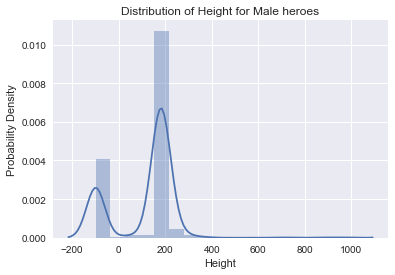

Mean Height for male heroes: 107.27524752475247
Median Height for male heroes: 180.0


In [540]:
# Male Height
show_distplot(heroes_and_powers_df, 'Male', 'Height')
print("Mean Height for male heroes: {}".format(np.mean(male_heroes_df.Height)))
print("Median Height for male heroes: {}".format(np.median(male_heroes_df.Height)))

/Users/rndatasc/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


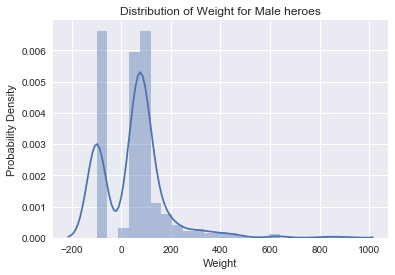

Mean weight for male heroes: 52.03535681436996
Median weight for male heroes: 79.0


In [541]:
# Male Weight
show_distplot(heroes_and_powers_df, 'Male', 'Weight')
print("Mean weight for male heroes: {}".format(np.mean(male_heroes_df.Weight)))
print("Median weight for male heroes: {}".format(np.median(male_heroes_df.Weight)))
#received ValueError: cannot convert float NaN to integer
#installed pip install --upgrade matplotlib_venn - corrected


/Users/rndatasc/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


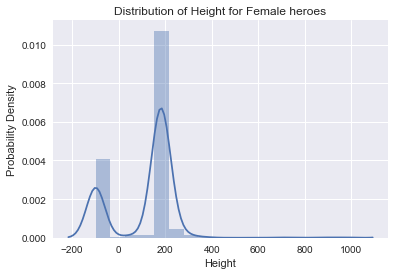

Mean weight for female heroes: 98.0525
Median weight for female heroes: 168.0


In [542]:
# Female Height
show_distplot(heroes_and_powers_df, 'Female', 'Height')
print("Mean weight for female heroes: {}".format(np.mean(female_heroes_df.Height)))
print("Median weight for female heroes: {}".format(np.median(female_heroes_df.Height)))



/Users/rndatasc/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


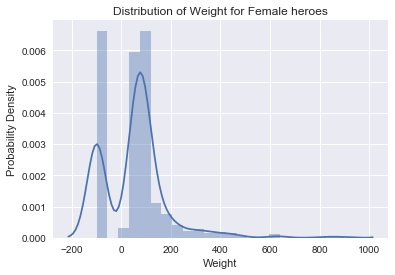

Mean weight for female heroes: 27.265
Median weight for female heroes: 54.0


In [543]:
# Female Weight
show_distplot(heroes_and_powers_df, 'Female', 'Weight')
print("Mean weight for female heroes: {}".format(np.mean(female_heroes_df.Weight)))
print("Median weight for female heroes: {}".format(np.median(female_heroes_df.Weight)))



Discuss your findings from the plots above, with respect to the distibution of height and weight by gender.  Your explanation should include discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Wite your answer below this line:
____________________________________________________________________________________________________________________________



### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [544]:
def top_5_powers(dataframe):
    df = dataframe.drop(heroes_df.columns.values[1:], axis=1)
    columns = df.columns.values
    for col in columns:
        df[col] = df[col].map({"True": 1, "False": 0})
        
    power_counts_dict = dict(df.sum())
    
    return sorted(power_counts_dict.items(), key=lambda x: x[1], reverse=True)[:5] 
    
overall_top_5 = top_5_powers(heroes_and_powers_df)
marvel_df = heroes_and_powers_df[heroes_and_powers_df['Publisher'] == 'Marvel Comics']
dc_df = heroes_and_powers_df[heroes_and_powers_df['Publisher'] == 'DC Comics']
print(overall_top_5)

[('Super Strength', 362), ('Stamina', 294), ('Durability', 262), ('Super Speed', 251), ('Agility', 244)]


In [545]:
marvel_top_5 = top_5_powers(marvel_df)
print(marvel_top_5)

[('Super Strength', 204), ('Durability', 154), ('Stamina', 150), ('Super Speed', 137), ('Agility', 126)]


In [546]:
dc_top_5 = top_5_powers(dc_df)
print(dc_top_5)

[('Super Strength', 109), ('Stamina', 90), ('Flight', 86), ('Super Speed', 79), ('Agility', 71)]


<Figure size 432x288 with 0 Axes>

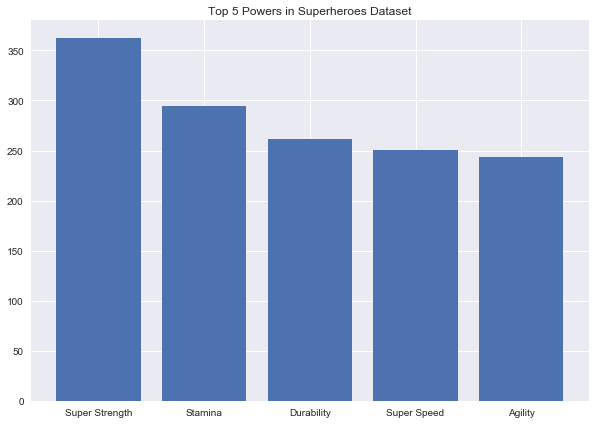

None

<Figure size 432x288 with 0 Axes>

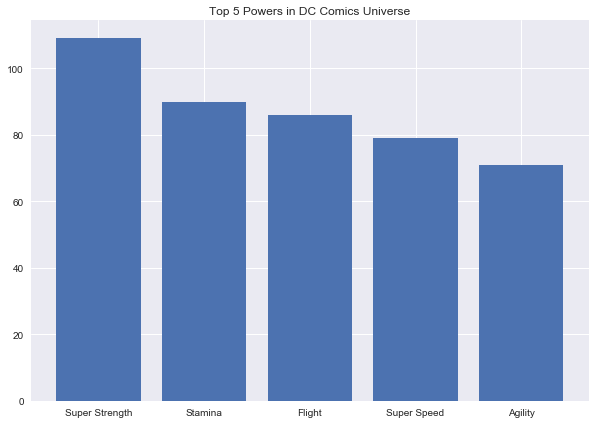

None

<Figure size 432x288 with 0 Axes>

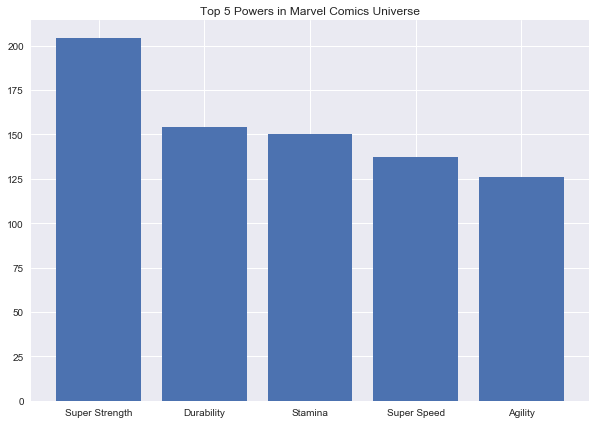

In [547]:
def top_5_bar_chart(top_5_list, publisher=None):
    marvel_powers = [i[0] for i in top_5_list]
    marvel_values = [i[1] for i in top_5_list]

    plt.clf()
    plt.figure(figsize=(10, 7))
    plt.bar(marvel_powers, marvel_values)
    if publisher:
        plt.title("Top 5 Powers in {} Universe".format(publisher))
    else:
        plt.title("Top 5 Powers in Superheroes Dataset")
    plt.show()

display(top_5_bar_chart(overall_top_5))
display(top_5_bar_chart(dc_top_5, publisher="DC Comics"))
top_5_bar_chart(marvel_top_5, publisher="Marvel Comics")

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Wite your answer below this line:
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occuring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [551]:
hp = heroes_and_powers_df
hp.columns = hp.columns.str.replace(' ', '_')
hp.columns
display(type(hp))
hp.head()

pandas.core.frame.DataFrame

,Agility,Accelerated_Healing,Lantern_Power_Ring,Dimensional_Awareness,Cold_Resistance,Durability,Stealth,Energy_Absorption,Flight,Danger_Sense,...,Gender,Eye_color,Race,Hair_color,Height,Publisher,Skin_color,Alignment,Weight,Strength_Flight
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,False
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,False
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,False
Abomination,False,True,False,False,False,False,False,False,False,False,...,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,False
Abraxas,False,False,False,True,False,False,False,False,True,False,...,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,True


In [552]:
hp['Strength_Flight'] =((hp.Super_Strength== 'True') & (hp.Flight =='True'))
hp.head()


,Agility,Accelerated_Healing,Lantern_Power_Ring,Dimensional_Awareness,Cold_Resistance,Durability,Stealth,Energy_Absorption,Flight,Danger_Sense,...,Gender,Eye_color,Race,Hair_color,Height,Publisher,Skin_color,Alignment,Weight,Strength_Flight
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,False
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,False
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,False
Abomination,False,True,False,False,False,False,False,False,False,False,...,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,False
Abraxas,False,False,False,True,False,False,False,False,True,False,...,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,True


Text(0.5, 0, 'Stength_Flight')

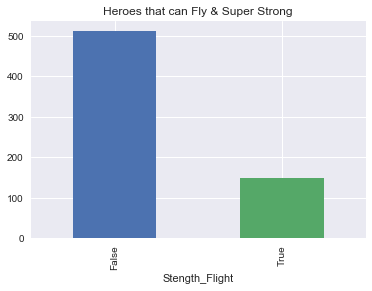

In [563]:
hp.Strength_Flight.value_counts().plot(kind='bar', title='Heroes that can Fly & Super Strong')
plt.xlabel('Stength_Flight')


In [553]:
# Which powers have the highest chance of co-occuring in a hero (e.g. super strength and flight), and does this differ by gender?
display(hp[(hp.Gender =='Female') & (hp.Strength_Flight == 1)].shape)
hp[(hp.Gender =='Male') & (hp.Strength_Flight == 1)].shape
#There are more male heroes that have Super Strength and can fly


(33, 177)

(111, 177)

In [555]:
# Is there a relationship between a hero's ability to fly and  super strength powers
#and their height and weight?
hp.corr()

,Height,Weight,Strength_Flight
Height,1.000000,0.647168,0.031218
Weight,0.647168,1.000000,0.027644
Strength_Flight,0.031218,0.027644,1.000000


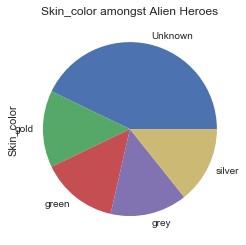

In [577]:
# What is the distribution of skin colors amongst alien heroes?
#hp.Skin_color.value_counts() 
#hp[(hp['Race'] == 'Alien')
#hp.Skin_color.value_counts()
#hp.loc[hp.Skin_color=='-','Skin_color'] = 'Unknown'  
Rhp = hp[(hp['Race'] == 'Alien')]
Rhp.Skin_color.value_counts()
#hp.groupby('Skin_color').Race.isin.
Rhp.Skin_color.value_counts().sort_index().plot(kind='pie', title="Skin_color amongst Alien Heroes")



In [528]:
#hp.shape #660,177  #checks # of rows & columns
#hp.isna().any().any()  #False check for any nulls
#hp.dropna(how='any').shape  # removes any nan
#hp.Gender.value_counts() #checks for invalid values
#hp.Gender.str.replace('-','Unknown').head()  #did not work
#hp.loc[hp.Gender=='-','Gender'] = 'Male'    #replaced - with Male
#hp.Gender.value_counts()  #only Male & Fema;le values remain
#hp.reset_index(inplace=True)
#hp.set_index(['Gender', 'Strength_Flight'], inplace=True)
#hp.sort_index(inplace=True)
#hp.groupby('Gender').Strength_Flight.value_counts()
# male_StrengthFlight_df = hp[hp['Gender'] == 'Male' & Strength_Flight ==]
# female_StrengthFlight_df = hp[hp['Gender'] == 'Female']
#(hp.Strength_Flight==1) & (hp.Gender =='Male')
#Strength_Flight



In [581]:
#Alien heroes weight comparison by gender
dfp = Rhp.pivot_table(values='Height', index='Gender', columns='Race')
dfp

Race,Alien
Gender,
Female,47.0
Male,203.4


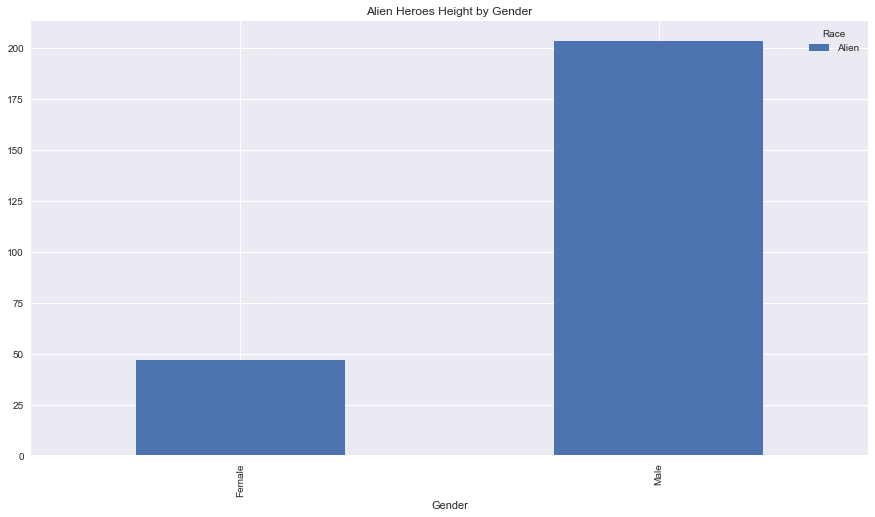

In [586]:
dfp.plot(kind='bar', figsize=(15,8),title='Alien Heroes Height by Gender')


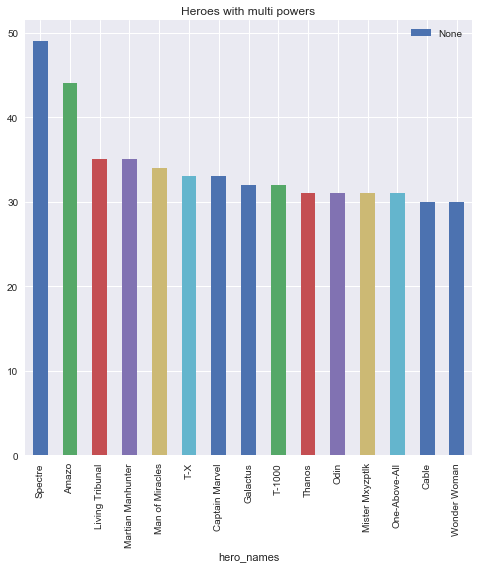

In [587]:
#powers have the highest chance of co-occuring in a hero
powers_df = pd.read_csv('super_hero_powers.csv')
powers_df.set_index('hero_names',inplace = True)
plt1 =powers_df.sum(axis=1).sort_values(ascending=False)[:15]

plt.style.use('seaborn')
plt1.plot(kind='bar',title='Heroes with multi powers', figsize=(8,8),legend=True)

In [591]:
# multiple aggregation functions can be applied simultaneously to skin color
hp.groupby('Skin_color').Height.agg(['count', 'mean', 'min', 'max'])


,count,mean,min,max
Skin_color,,,,
Unknown,588,108.477381,-99.0,876.0
black,1,244.000000,244.0,244.0
blue,9,119.444444,-99.0,191.0
blue-white,1,229.000000,229.0,229.0
gold,3,85.666667,-99.0,193.0
gray,1,213.000000,213.0,213.0
green,21,155.000000,-99.0,975.0
grey,5,194.800000,108.0,267.0
orange,1,193.000000,193.0,193.0


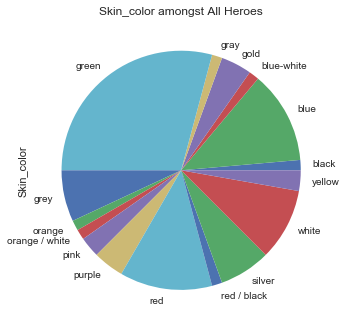

In [594]:
Shp= hp[(hp['Skin_color'] != 'Unknown')]
Shp.Skin_color.value_counts().sort_index().plot(kind='pie', title="Skin_color amongst All Heroes")


## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data